## Multi-layer perceptron


In [1]:
import robpy.neural_process as rnp
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

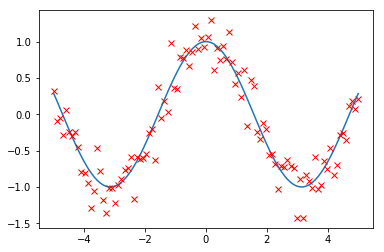

In [2]:
# Generate some toy data

t = np.linspace(-5,5,100).reshape((100,1))
y = np.cos(t)
yn = y + np.random.normal(0,0.2,100).reshape((100,1))

plt.plot(t[:,0],y[:,0])
plt.plot(t[:,0],yn[:,0],'rx')
plt.show()

Loss before training: 1.23349618912


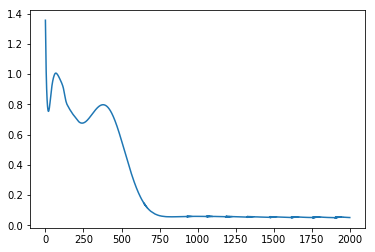

Loss after training: 0.00828921888024


In [5]:
# Train a mlp

with tf.Session() as sess:
    mlp = rnp.MLPReg(hidden_units=[15,20,15], in_dims=1, out_dims=1, hidden_activation=tf.nn.tanh, batch_norm=True, lr=1e-3)

    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    init_loss = mlp.eval_loss(sess, t, y)
    print("Loss before training: {}".format(init_loss))

    history = mlp.fit(sess, t, yn, batch_size=100, epochs=2000)
    plt.plot(history['loss'])
    plt.show()

    final_loss = mlp.eval_loss(sess, t, y)
    print("Loss after training: {}".format(final_loss))
    pred = mlp.predict(sess, t)

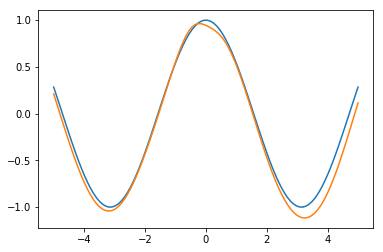

In [6]:
plt.plot(t,y)
plt.plot(t,pred)
plt.show()